In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b5159fe3-d528-4ecb-98e9-57d994d0526d/file_downloaded -O plantvillage_dataset.zip
!unzip plantvillage_dataset.zip -d /content/drive/MyDrive/plantvillage_data


--2025-07-09 07:52:31--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b5159fe3-d528-4ecb-98e9-57d994d0526d/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1141 (1.1K) [application/json]
Saving to: ‘plantvillage_dataset.zip’

plantvillage_datase 100%[===================>]   1.11K  --.-KB/s    in 0s      

2025-07-09 07:52:32 (17.0 MB/s) - ‘plantvillage_dataset.zip’ saved [1141/1141]

Archive:  plantvillage_dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of plantvillage_dataset.zip or
        plantvillage_dataset.zip.zip,

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wycliffkimani","key":"c8d009463594f65a589998511f0f4f59"}'}

In [ ]:
# uploading kaggle.json from laptop
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# installing kaggle
!pip install -q kaggle

# downloading the plant village dataset
!kaggle datasets download -d emmarex/plantdisease

# unzipping the dataset
!unzip -q plantdisease.zip -d /content/drive/MyDrive/plant_village_dataset

# verifying folder structure
!ls /content/drive/MyDrive/plant_village_dataset/PlantVillage


Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 99% 650M/658M [00:06<00:00, 39.1MB/s]
100% 658M/658M [00:06<00:00, 99.2MB/s]
Pepper__bell___Bacterial_spot  Tomato_Late_blight
Pepper__bell___healthy	       Tomato_Leaf_Mold
Potato___Early_blight	       Tomato_Septoria_leaf_spot
Potato___healthy	       Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Late_blight	       Tomato__Target_Spot
Tomato_Bacterial_spot	       Tomato__Tomato_mosaic_virus
Tomato_Early_blight	       Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_healthy


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# setting the paths
original_dir = '/content/drive/MyDrive/plant_village_dataset/PlantVillage'
base_dir = '/content/drive/MyDrive/plant_village_dataset'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')

# crwating train and valid folders
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# looping through each class
for class_name in os.listdir(original_dir):
    class_path = os.path.join(original_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    train_imgs, valid_imgs = train_test_split(images, test_size=0.2, random_state=42)

    # creating 2 class folderss
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(valid_dir, class_name), exist_ok=True)

    # Moving some of the images to train folser
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img),
                    os.path.join(train_dir, class_name, img))

    # Moving some of the images to valid
    for img in valid_imgs:
        shutil.copy(os.path.join(class_path, img),
                    os.path.join(valid_dir, class_name, img))

print("Train/Valid split completed.")


Train/Valid split completed.


In [10]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# normaliz the images and reset them for the resnet - like to appear the same
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Define dataset paths
train_dir = "/content/drive/MyDrive/plant_village_dataset/train"
valid_dir = "/content/drive/MyDrive/plant_village_dataset/valid"

# load the datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(valid_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# get class names - am gonna change this name later - too many class_names in my work folder.
class_names = train_dataset.classes
num_classes = len(class_names)

print(f"the data is ready. Classes: {num_classes}")


✅ Data ready. Classes: 15


In [11]:
import os

print("Train class folders:")
print(os.listdir(train_dir))
print("\nValidation class folders:")
print(os.listdir(valid_dir))


Train class folders:
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

Validation class folders:
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [12]:
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    num_files = len(os.listdir(cls_path))
    print(f"{cls}: {num_files} images")


Pepper__bell___Bacterial_spot: 797 images
Pepper__bell___healthy: 1182 images
Potato___Early_blight: 800 images
Potato___Late_blight: 800 images
Potato___healthy: 121 images
Tomato_Bacterial_spot: 1701 images
Tomato_Early_blight: 800 images
Tomato_Late_blight: 1527 images
Tomato_Leaf_Mold: 761 images
Tomato_Septoria_leaf_spot: 1416 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1340 images
Tomato__Target_Spot: 1123 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 2567 images
Tomato__Tomato_mosaic_virus: 298 images
Tomato_healthy: 1272 images


In [13]:
import torch
import torch.nn as nn
import torchvision.models as models

# lets check of we have a GPU or if we are gonna uise cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load ResNet18 model
resnet18 = models.resnet18(pretrained=True)


for param in resnet18.parameters():
    param.requires_grad = False

num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 15)  # You can also use len(class_names)

# Move model to the device - mostly cpu
resnet18 = resnet18.to(device)

# define loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.fc.parameters(), lr=0.001)

print("ResNet18 model loaded, final layer replaced, and ready for training.")


Using device: cpu


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 26.2MB/s]


✅ ResNet18 model loaded, final layer replaced, and ready for training.


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm

# Since I have no access to GPU, lets set the device to use CPU instea, man its gonna be slow
device = torch.device("cpu")
print("Device in use:", device)

# Load pretrained ResNet18 and modify the final layer and finetune the model
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # freeze all layers

model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define thee loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

#Training loop
num_epochs = 5  # You can increase later
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", ncols=100)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loop.set_postfix(loss=loss.item(), acc=100 * correct / total)

    print(f"Epoch {epoch+1} completed | Loss: {running_loss:.4f} | Accuracy: {100 * correct / total:.2f}%")

# Now to saving the AgroAI model
torch.save(model.state_dict(), "plant_resnet18_cpu.pth")
print("Model saved as AgroAImodel.pth")


Device in use: cpu


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/5: 100%|██████████████████████████| 1032/1032 [11:29<00:00,  1.50it/s, acc=73.7, loss=0.722]


✅ Epoch 1 completed | Loss: 884.9239 | Accuracy: 73.73%


Epoch 2/5: 100%|██████████████████████████| 1032/1032 [11:20<00:00,  1.52it/s, acc=82.6, loss=0.519]


✅ Epoch 2 completed | Loss: 557.1638 | Accuracy: 82.65%


Epoch 3/5: 100%|███████████████████████████| 1032/1032 [11:14<00:00,  1.53it/s, acc=84.3, loss=1.65]


✅ Epoch 3 completed | Loss: 494.5228 | Accuracy: 84.32%


Epoch 4/5: 100%|██████████████████████████| 1032/1032 [11:14<00:00,  1.53it/s, acc=84.9, loss=0.329]


✅ Epoch 4 completed | Loss: 467.1331 | Accuracy: 84.94%


Epoch 5/5: 100%|██████████████████████████| 1032/1032 [11:16<00:00,  1.53it/s, acc=85.4, loss=0.502]

✅ Epoch 5 completed | Loss: 446.1619 | Accuracy: 85.39%
✅ Model saved as plant_resnet18_cpu.pth


In [18]:
# Now to saving the AgroAI model
torch.save(model.state_dict(), "AgroAImodel.pth")
print("Model saved as AgroAImodel.pth")

Model saved as AgroAImodel.pth


In [20]:
# Assuming you already mounted your drive as /content/drive
import shutil

# Copy model to a folder in Drive
shutil.copy("plant_resnet18_cpu.pth", "/content/drive/MyDrive/AgroAImodel.pth")
print("Model saved to Google Drive.")


✅ Model saved to Google Drive.


In [21]:
from google.colab import files

# Download model to my laptop
files.download("AgroAImodel.pth")
files.download("plant_resnet18_cpu.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import json

# Save class names as agroaimodel_class_names.json
with open("AgroAImodel_class_names.json", "w") as f:
    json.dump(class_names, f)

print("Class names saved as AgroAImodel_class_names.json")


Class names saved as AgroAImodel_class_names.json


In [23]:
# saving the json file to the laptop
from google.colab import files
files.download("AgroAImodel_class_names.json")
print("File saves to Laptop")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File saves to Laptop


In [37]:
# savong the casss names to both the content and My Drive
!cp AgroAImodel_class_names.json /content/drive/MyDrive/
print("Class names saved to both local and Drive")

Class names saved to both local and Drive


In [26]:
!ls /content/drive/MyDrive/class_names.json


/content/drive/MyDrive/class_names.json


In [27]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Set model to evaluation mode
resnet18.eval()

# Store true and predicted labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))


✅ Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.80      0.66      0.73       200
                     Pepper__bell___healthy       0.59      0.99      0.74       296
                      Potato___Early_blight       0.90      0.90      0.90       200
                       Potato___Late_blight       0.89      0.65      0.75       200
                           Potato___healthy       1.00      0.35      0.52        31
                      Tomato_Bacterial_spot       0.86      0.30      0.44       426
                        Tomato_Early_blight       0.41      0.56      0.47       200
                         Tomato_Late_blight       0.60      0.63      0.62       382
                           Tomato_Leaf_Mold       0.55      0.47      0.51       191
                  Tomato_Septoria_leaf_spot       0.54      0.75      0.63       355
Tomato_Spider_mites_Two_spotted_spider_

📦 Device in use: cpu
✅ Loaded 15 class names.
✅ Model loaded and ready for prediction.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


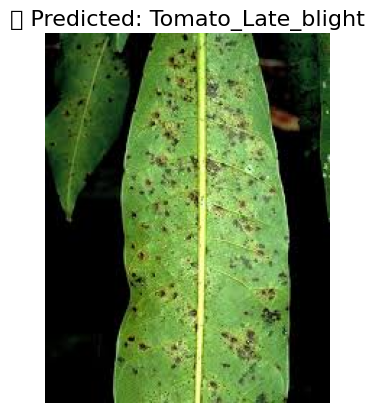

In [36]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import os

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device in use: {device}")

# Load class names - Angroaimodel_class_names.json
class_names_path = "/content/AgroAImodel_class_names.json"
if not os.path.exists(class_names_path):
    raise FileNotFoundError(f"❌ Class names JSON not found at {class_names_path}")

with open(class_names_path, "r") as f:
    class_names = json.load(f)
num_classes = len(class_names)
print(f"Loaded {num_classes} class names.")

# Load the model
model_path = "/content/AgroAImodel.pth"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}")

from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()
print("Saving the model loaded and ready for prediction.")

# function prediction
def predict_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at {image_path}")

    image = Image.open(image_path).convert("RGB")

    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted = torch.max(outputs, 1)
        class_index = predicted.item()
        if class_index >= len(class_names):
            raise IndexError("Predicted class index out of range.")
        predicted_class = class_names[class_index]

    # Show the image you uploaded and the prediction of the model
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"🧠 Predicted: {predicted_class}", fontsize=16)
    plt.show()

# give the image path
test_image_path = "/content/image4.jpg"
predict_image(test_image_path)


In [30]:
import torch
from sklearn.metrics import classification_report
import json
from google.colab import files

# Step 1: Get predictions and true labels
y_true = []
y_pred = []

resnet18.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = resnet18(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Step 2: Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Step 3: Save report locally
with open("AgroAI_classification_report.json", "w") as f:
    json.dump(report, f, indent=4)

# Step 4: Save to Drive
!cp AgroAI_classification_report.json /content/drive/MyDrive/

# Step 5: Download to your laptop
files.download("AgroAI_classification_report.json")

print("Classification report saved to local, Google Drive, and downloaded to your laptop.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Classification report saved to local, Google Drive, and downloaded to your laptop.
